In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import numpy as np
import requests
import time
import random
from datetime import date

# Import API key
from config2 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_range

(-90, 90)

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# settings to make the API calls
settings = {"units" : "metrics", "appid" : api_key}

# information to obtain from API
summary = ['coord.lat', 'main.temp', 'main.humidity', 'clouds.all', 'wind.speed']
summary

['coord.lat', 'main.temp', 'main.humidity', 'clouds.all', 'wind.speed']

In [4]:
city_dic = {}

i = 0

while i <= 500:
    lat = round(random.uniform(-90, 90), 7)
    lon = round(random.uniform(-180, 180), 7)
    city = citipy.nearest_city(lat, lon)
    
    if city.city_name not in city_dic:
        try:
            current_weather = owm.get_current(city.city_name, **settings)
            city_dic[city.city_name] = current_weather(*summary)
            print(f"City number {i+1} : {city.city_name}")
            i += 1
        except:
            print("\tCity not found")

City number 1 : clyde river
City number 2 : bethel
City number 3 : longkou
City number 4 : cape town
City number 5 : butaritari
	City not found
City number 6 : chuy
City number 7 : bahia honda
	City not found
City number 8 : dwarka
City number 9 : charters towers
City number 10 : saskylakh
City number 11 : thompson
City number 12 : port macquarie
City number 13 : bredasdorp
City number 14 : faanui
City number 15 : nikolskoye
City number 16 : ecoporanga
City number 17 : puerto ayora
City number 18 : coihaique
City number 19 : ipixuna
City number 20 : raudeberg
City number 21 : hilo
City number 22 : ilulissat
City number 23 : tarauaca
City number 24 : broken hill
	City not found
City number 25 : rikitea
City number 26 : busselton
City number 27 : ushuaia
City number 28 : albany
City number 29 : bara
City number 30 : kapaa
City number 31 : tuktoyaktuk
City number 32 : upington
City number 33 : payo
City number 34 : wajima
City number 35 : khanapur
City number 36 : norman wells
City number

City number 274 : tromso
City number 275 : lusambo
City number 276 : paka
	City not found
City number 277 : padang
City number 278 : togur
City number 279 : myaundzha
	City not found
	City not found
City number 280 : coahuayana
City number 281 : liuli
City number 282 : navolato
City number 283 : oswego
	City not found
City number 284 : kouroussa
City number 285 : kampene
City number 286 : te anau
City number 287 : road town
City number 288 : san patricio
City number 289 : saint-georges
City number 290 : ulladulla
	City not found
City number 291 : san cristobal
City number 292 : hualmay
City number 293 : verkhnevilyuysk
City number 294 : kondinskoye
City number 295 : arjawinangun
City number 296 : limbang
	City not found
	City not found
	City not found
City number 297 : sao joao da barra
City number 298 : najran
	City not found
City number 299 : porto novo
City number 300 : chokurdakh
	City not found
City number 301 : carutapera
City number 302 : kushima
City number 303 : cabo san lucas

In [18]:
city_df = pd.DataFrame.from_dict(city_dic, orient='index')
city_df = city_df.rename(columns={0 : 'Latitude', 1 : 'Temperature', 2 : 'Humidity', 3 : 'Cloudiness', 4 : 'Wind Speed'})
city_df.head()

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
clyde river,70.47,278.150,93,75,6.70
bethel,60.79,285.470,93,90,3.60
longkou,37.64,298.046,75,0,1.44
cape town,-33.93,283.850,66,40,6.20
butaritari,3.07,302.546,66,100,3.41


In [19]:
city_df.to_csv("CityWeather.csv")

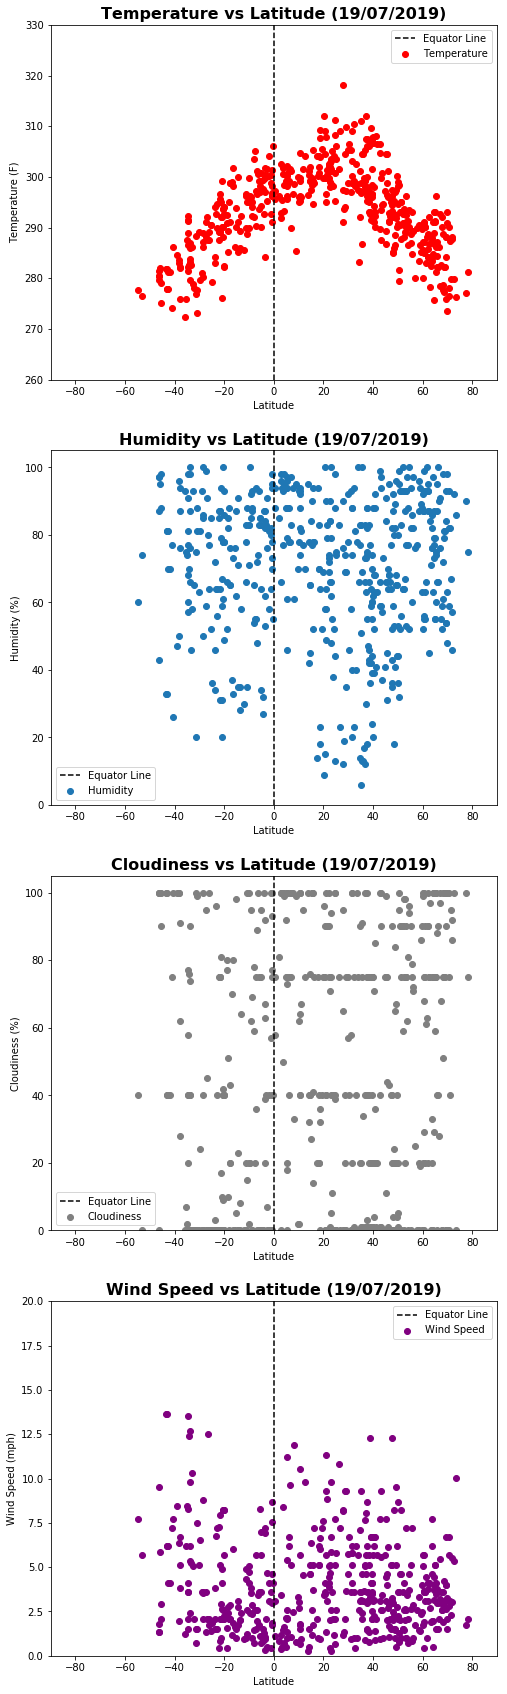

In [38]:
fig, (temp, hum, clo, wind) = plt.subplots(4, figsize=(8,30))
#fig.suptitle("Weather Analysis", fontsize=16, fontweight='bold')

today = date.today().strftime("%d/%m/%Y")

temp.scatter(city_df['Latitude'], city_df['Temperature'], color='red')
temp.set_ylabel("Temperature")
temp.set_xlabel("Latitude")
temp.set_title(f"Temperature vs Latitude ({today})", fontsize = 16, fontweight = 'bold')
temp.set_xlim((-90,90))
temp.set_ylim((260, 330))
temp.axvline(0, color='black', ls="--", label='Equator Line')
temp.legend(loc='best')

hum.scatter(city_df['Latitude'], city_df['Humidity'])
hum.set_ylabel("Humidity (%)")
hum.set_xlabel("Latitude")
hum.set_title(f"Humidity vs Latitude ({today})", fontsize = 16, fontweight = 'bold')
hum.set_xlim((-90,90))
hum.set_ylim((0, 105))
hum.axvline(0, color='black', ls="--", label='Equator Line')
hum.legend(loc='lower left')

clo.scatter(city_df['Latitude'], city_df['Cloudiness'], color='grey')
clo.set_ylabel("Cloudiness (%)")
clo.set_xlabel("Latitude")
clo.set_title(f"Cloudiness vs Latitude ({today})", fontsize = 16, fontweight = 'bold')
clo.set_xlim((-90,90))
clo.set_ylim((0, 105))
clo.axvline(0, color='black', ls="--", label='Equator Line')
clo.legend(loc='lower left')

wind.scatter(city_df['Latitude'], city_df['Wind Speed'], color='purple')
wind.set_ylabel("Wind Speed (mph)")
wind.set_xlabel("Latitude")
wind.set_title(f"Wind Speed vs Latitude ({today})", fontsize = 16, fontweight = 'bold')
wind.set_xlim((-90,90))
wind.set_ylim((0, 20))
wind.axvline(0, color='black', ls="--", label='Equator Line')
wind.legend(loc='best')

plt.show()

In [42]:
extentTemp = temp.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('TempvsLat.png', bbox_inches=extentTemp.expanded(1.2, 1.2))
extentHum = hum.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('HumvsLat.png', bbox_inches=extentHum.expanded(1.2, 1.2))
extentClo = clo.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ClovsLat.png', bbox_inches=extentClo.expanded(1.2, 1.2))
extentWind = wind.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('WindvsLat.png', bbox_inches=extentWind.expanded(1.2, 1.2))

In [43]:
print('1. The temperature of the equator is higher than the cities that are far from it')
print('2. Also in the Equator the humidy tend to grow, not at the same level as the temperature.')
print('3. The wind speed do not have any relation with the wind speed.')

1. The temperature of the equator is higher than the cities that are far from it
2. Also in the Equator the humidy tend to grow, not at the same level as the temperature.
3. The wind speed do not have any relation with the wind speed.
